<a href="https://colab.research.google.com/github/Sagarj2123/4002_Deep-Learning/blob/main/4002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [ ]:
print("Null values in X_train:", np.isnan(X_train).sum())
print("Null values in X_test:", np.isnan(X_test).sum())


Null values in X_train: 0
Null values in X_test: 0


In [ ]:
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)


In [ ]:
input_tensor = Input(shape=(32, 32, 3))

base_model = VGG16(
    weights="imagenet",
    include_top=False,
    input_tensor=input_tensor
)

# Freeze VGG layers
for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(256, activation="relu")(x)
output = Dense(10, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,586 (56.64 MB)

 Trainable params: 133,898 (523.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


In [ ]:
X_train = X_train.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)


In [ ]:
y_train = to_categorical(y_train, 10)
y_val   = to_categorical(y_val, 10)
y_test  = to_categorical(y_test, 10)


In [ ]:
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)


X_train: (40000, 32, 32, 3)
y_train: (40000, 10)


In [ ]:
X_train: (40000, 32, 32, 3)
y_train: (40000, 10)


In [ ]:
input_tensor = Input(shape=(32, 32, 3))

base_model = VGG16(
    weights="imagenet",
    include_top=False,
    input_tensor=input_tensor
)

# Freeze pretrained layers
for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(256, activation="relu")(x)
output = Dense(10, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)


In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=64
)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 545s 870ms/step - accuracy: 0.3097 - loss: 1.9977 - val_accuracy: 0.4792 - val_loss: 1.5219
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 502s 803ms/step - accuracy: 0.5016 - loss: 1.4742 - val_accuracy: 0.5166 - val_loss: 1.3935
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 498s 797ms/step - accuracy: 0.5333 - loss: 1.3632 - val_accuracy: 0.5431 - val_loss: 1.3235
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 546s 867ms/step - accuracy: 0.5563 - loss: 1.2983 - val_accuracy: 0.5522 - val_loss: 1.2888
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 497s 796ms/step - accuracy: 0.5692 - loss: 1.2585 - val_accuracy: 0.5615 - val_loss: 1.2664
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 544s 863ms/step - accuracy: 0.5831 - loss: 1.2241 - val_accuracy: 0.5680 - val_loss: 1.2428
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 541s 866ms/step - accuracy: 0.5802 - loss: 1.2204 - val_accuracy: 0.5710 - val_loss: 1.2311
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 544s 871ms/step - accuracy: 0.5850 -

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 522s 833ms/step - accuracy: 0.3040 - loss: 2.0114 - val_accuracy: 0.4809 - val_loss: 1.5288
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 516s 825ms/step - accuracy: 0.5010 - loss: 1.4786 - val_accuracy: 0.5206 - val_loss: 1.3915
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 515s 824ms/step - accuracy: 0.5343 - loss: 1.3634 - val_accuracy: 0.5384 - val_loss: 1.3296
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 601s 888ms/step - accuracy: 0.5550 - loss: 1.2981 - val_accuracy: 0.5561 - val_loss: 1.2914
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 562s 888ms/step - accuracy: 0.5686 - loss: 1.2634 - val_accuracy: 0.5595 - val_loss: 1.2674
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 510s 817ms/step - accuracy: 0.5822 - loss: 1.2311 - val_accuracy: 0.5630 - val_loss: 1.2501
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 602s 881ms/step - accuracy: 0.5844 - loss: 1.2068 - val_accuracy: 0.5734 - val_loss: 1.2284
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 522s 816ms/step - accuracy: 0.5928 -

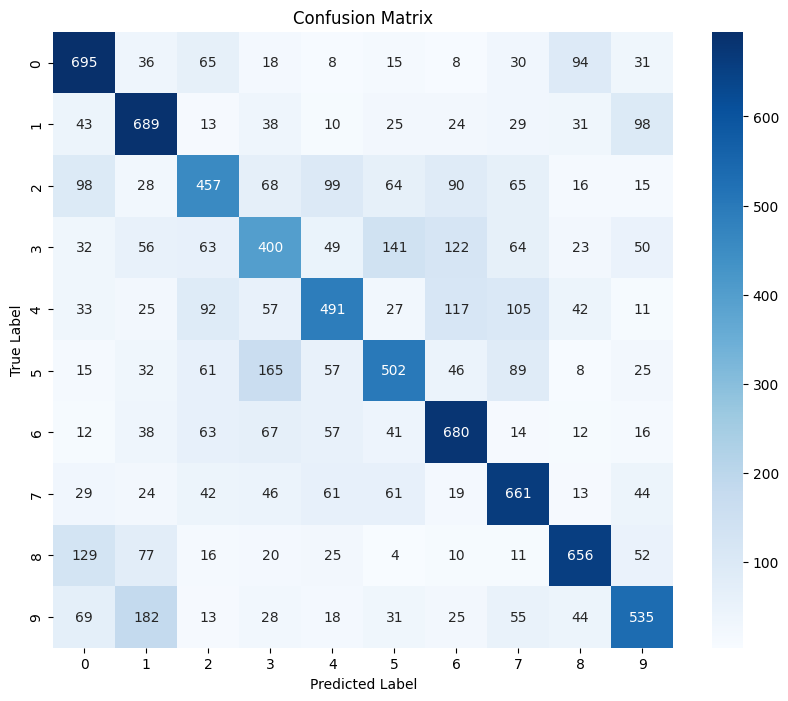


Classification Report:

              precision    recall  f1-score   support

           0       0.60      0.69      0.65      1000
           1       0.58      0.69      0.63      1000
           2       0.52      0.46      0.48      1000
           3       0.44      0.40      0.42      1000
           4       0.56      0.49      0.52      1000
           5       0.55      0.50      0.53      1000
           6       0.60      0.68      0.64      1000
           7       0.59      0.66      0.62      1000
           8       0.70      0.66      0.68      1000
           9       0.61      0.54      0.57      1000

    accuracy                           0.58     10000
   macro avg       0.57      0.58      0.57     10000
weighted avg       0.57      0.58      0.57     10000



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# -------------------------------
# Load Data
# -------------------------------
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

# Train Validation Split
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# One Hot Encoding
y_train = to_categorical(y_train, 10)
y_val   = to_categorical(y_val, 10)
y_test  = to_categorical(y_test, 10)

# -------------------------------
# Build Model
# -------------------------------
input_tensor = Input(shape=(32, 32, 3))

base_model = VGG16(
    weights="imagenet",
    include_top=False,
    input_tensor=input_tensor
)

# Freeze VGG Layers
for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(256, activation="relu")(x)
output = Dense(10, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# -------------------------------
# Train Model
# -------------------------------
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=64
)

# -------------------------------
# Model Evaluation
# -------------------------------
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

print("\nTest Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# -------------------------------
# Predictions
# -------------------------------
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# -------------------------------
# Confusion Matrix
# -------------------------------
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# -------------------------------
# Classification Report
# -------------------------------
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred))
